# **Forest Cover-Type prediction**

The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

In [ ]:
import pandas as pd #e Python библиотека за манипулација и анализа на податоците.
import numpy as np #e python библиотека што се користи за работа со низи
from sklearn.model_selection import train_test_split, cross_val_score
from numpy import absolute
from sklearn import metrics
import seaborn as sns


#read dataset(train and test)
train = pd.read_csv("/content/sample_data/train.csv")
test = pd.read_csv("/content/sample_data/test.csv")

In [ ]:
#show first five rows of train data
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
#show first five rows of test data
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# **Data Analysis & Visualization**

In [ ]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (15120, 56)
Testing data shape:  (565892, 55)


In [ ]:

# missing values for train dataset
# бараме дали има missing values во train dataset и ги прикажиме преку табела
missing_values_train = train.isnull().sum()
percentage_train = 100 * train.isnull().sum() / len(train)
missing_values_table_train = pd.concat([missing_values_train, percentage_train], axis=1)
missing_values_table_train.columns = ['Num. of missing values', '% of missing values']
print("Missing values table train")
print(missing_values_table_train)

Missing values table train
                                    Num. of missing values  % of missing values
Id                                                       0                  0.0
Elevation                                                0                  0.0
Aspect                                                   0                  0.0
Slope                                                    0                  0.0
Horizontal_Distance_To_Hydrology                         0                  0.0
Vertical_Distance_To_Hydrology                           0                  0.0
Horizontal_Distance_To_Roadways                          0                  0.0
Hillshade_9am                                            0                  0.0
Hillshade_Noon                                           0                  0.0
Hillshade_3pm                                            0                  0.0
Horizontal_Distance_To_Fire_Points                       0                  0.0
Wilderness_Ar

In [ ]:
# missing values for test dataset
# бараме дали има missing values во train dataset и ги прикажиме преку табела

missing_values_test = test.isnull().sum()
percentage_test = 100 * test.isnull().sum() / len(test)
missing_values_table_test = pd.concat([missing_values_test, percentage_test], axis=1)
missing_values_table_test.columns = ['Num. of missing values', '% of missing values']
print("Missing values table test")
print(missing_values_table_test)

Missing values table test
                                    Num. of missing values  % of missing values
Id                                                       0                  0.0
Elevation                                                0                  0.0
Aspect                                                   0                  0.0
Slope                                                    0                  0.0
Horizontal_Distance_To_Hydrology                         0                  0.0
Vertical_Distance_To_Hydrology                           0                  0.0
Horizontal_Distance_To_Roadways                          0                  0.0
Hillshade_9am                                            0                  0.0
Hillshade_Noon                                           0                  0.0
Hillshade_3pm                                            0                  0.0
Horizontal_Distance_To_Fire_Points                       0                  0.0
Wilderness_Are

## **Visualization**

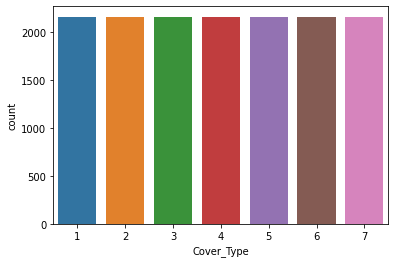

In [ ]:
sns.countplot(x = train.Cover_Type)

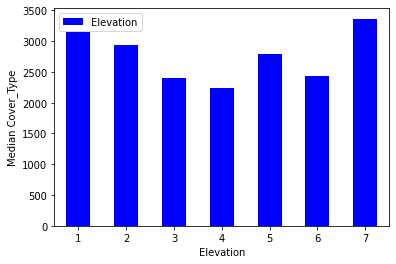

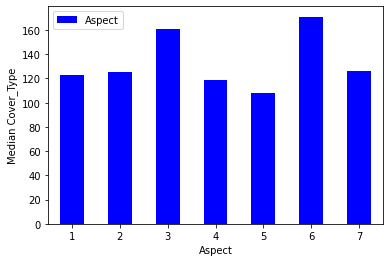

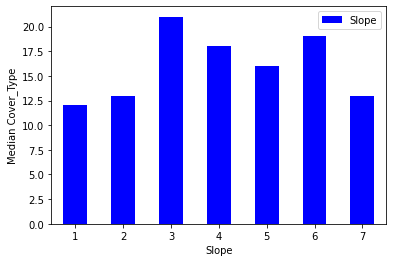

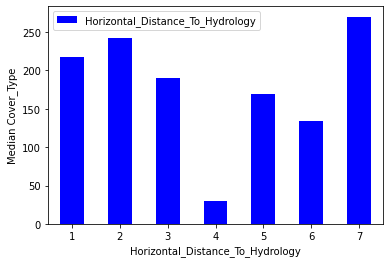

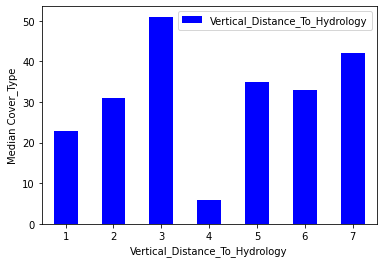

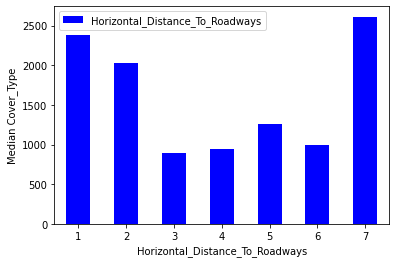

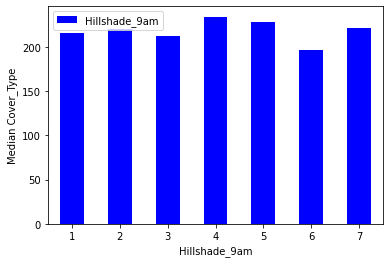

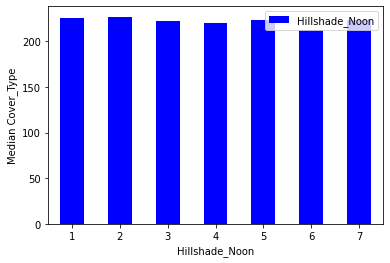

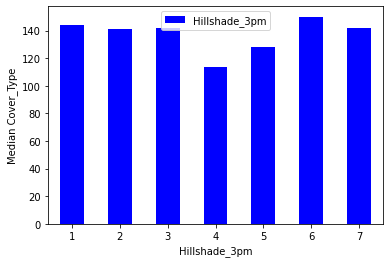

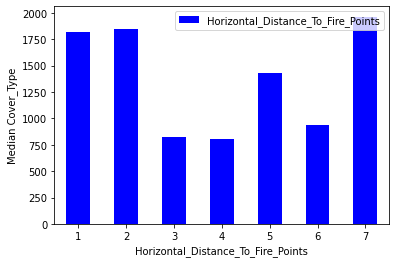

In [ ]:
#We see how various features compare with the Cover type
import matplotlib.pyplot as plt #e Python библиотека кој ни овозможува податоците да ги трансформираме како визуелизација.

# според визуелизација ги прикажиме кој од Cover_Type ги содржуват column_names и колку од нив.

column_names=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']                


for i in column_names:
    feature = train.pivot_table(index='Cover_Type',
                  values=i, aggfunc=np.median)
    feature.plot(kind='bar', color='blue')
    plt.xlabel(i)
    plt.ylabel('Median Cover_Type')
    plt.xticks(rotation=0)
    plt.show()

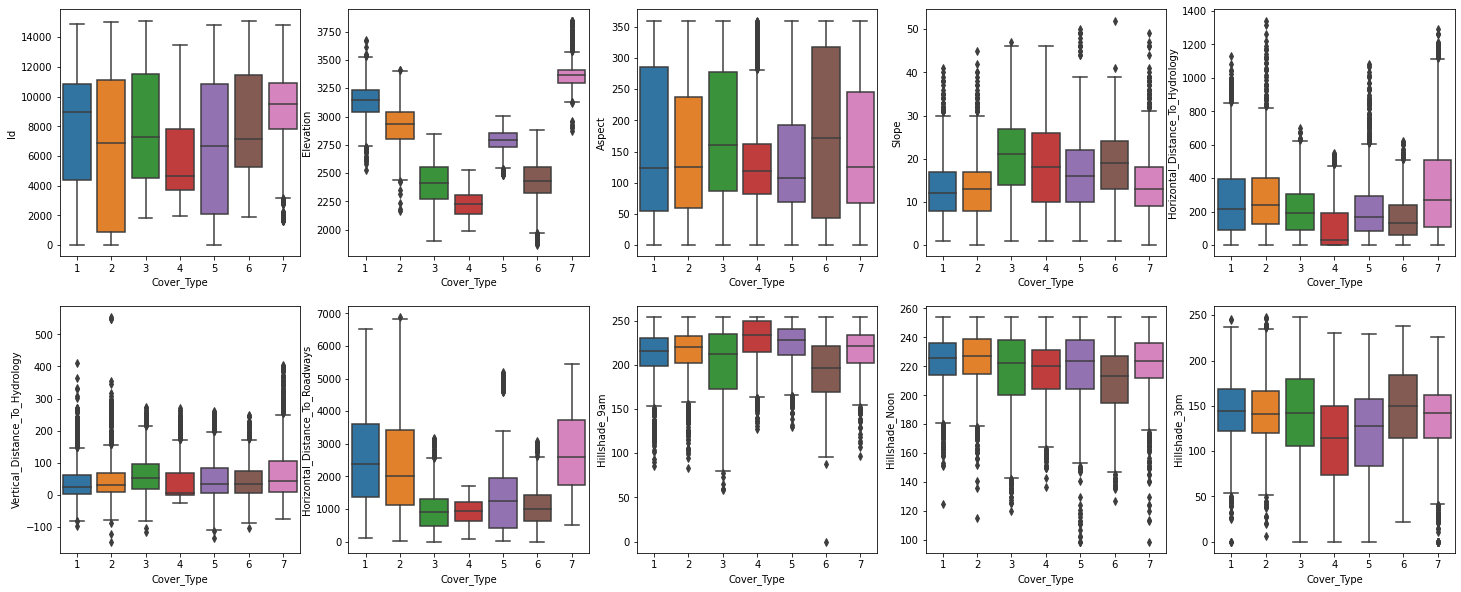

In [ ]:
import seaborn as sns

size=10
fig, axes = plt.subplots(nrows = 2,ncols = 5,figsize = (25,10))
for i in range(0,size):
    row = i // 5
    col = i % 5
    ax_curr = axes[row, col]
    sns.boxplot(x="Cover_Type", y=train.columns[i], data=train,ax=ax_curr);

**From the above visualizations**

Forest "Cover_Type" 1 and 7 have higher "Elevation" than others while 4 has lowest among the all.

All Forest "Cover_Type" are spreded out in "Aspect".
Forest Cover Type 1, 2 and 7 have higher Horizontal_Distance_To_Roadways.

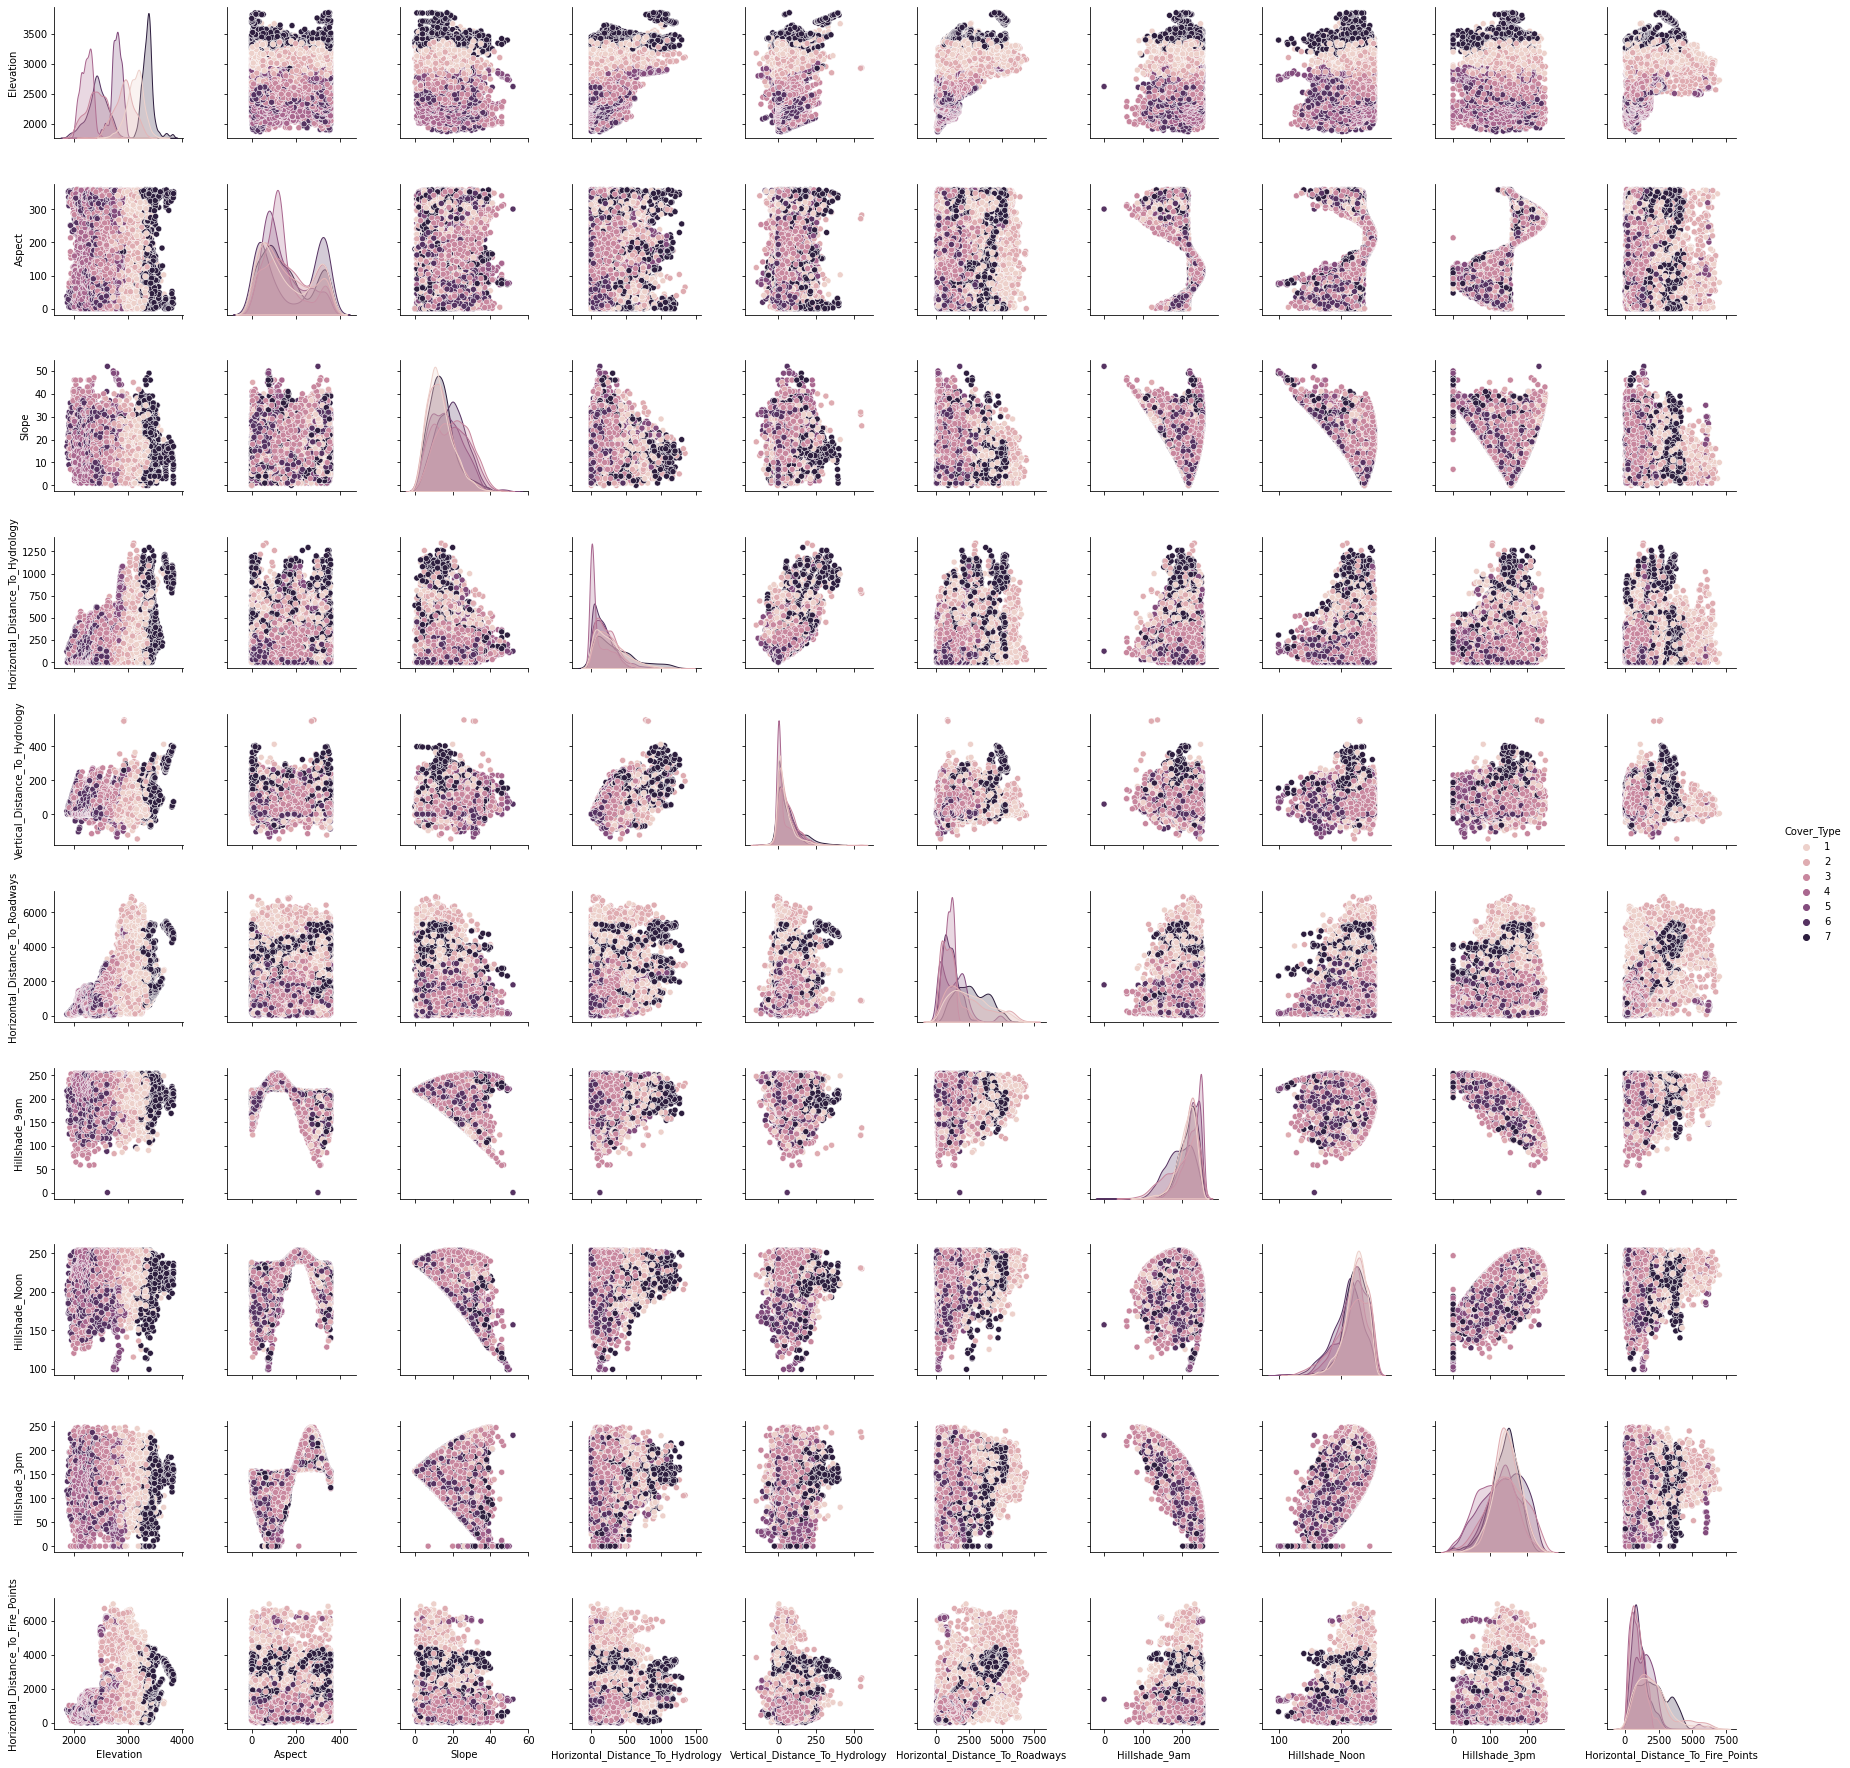

In [ ]:
sns.pairplot(train, hue='Cover_Type', vars=train.columns[1:11])

# **RandomForestClassifier**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

###**Decision Tree Classification:**
Ке ги групира податоци па после ке ги подели подгрупи според decision што може да се случи

# **Classification**
Класификацијата е задача да предвиди дискретна ознака на класа.
Алгоритам за класификација може да предвиди континуирана вредност, но континуираната вредност е во форма на веројатност за ознака на класа.
Предвидувањата за класификација може да се оценат со употреба на точност.

In [ ]:

#'Id','Cover_Type' ги дропнаме од train dataset сите други колони ке бидат во train_X
#train_y ке биде само колоната Cover_Type таа ке биде што ке ја тестираме.
train_X = train.drop(['Id','Cover_Type'],axis=1).values
train_X = train.Cover_Type.values
test_X = test.drop('Id',axis=1).values

# train_X и train_X ги делиме во train и test преку готовен функција со големина за test 0.2
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier

#го инцализираме со RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,random_state=0)
rfc.fit(X_train, y_train)

# правиме предикција преку RandomForestClassifier на X_test (предвидуавме таргет промелива врз база на влезни промеливи)
y_predRFC = rfc.predict(X_test)


In [ ]:
# на овој начин ги прикажиме сите метрики
print (metrics.classification_report(y_test,y_predRFC))

              precision    recall  f1-score   support

           1       0.78      0.78      0.78       419
           2       0.82      0.68      0.75       420
           3       0.86      0.84      0.85       450
           4       0.92      0.96      0.94       437
           5       0.90      0.97      0.93       404
           6       0.87      0.88      0.87       468
           7       0.92      0.97      0.95       426

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



In [ ]:
# Резултат на точност
print ("Accuracy score with RandomForest: ",metrics.accuracy_score(y_test,y_predRFC))

Accuracy score with RandomForest:  0.8693783068783069


In [ ]:
rfc.fit(train_X, train_y)
y_predRFCsumb = rfc.predict(test_X)


# предикцијата го чуваме според Ид на нов csv file
submRFC = pd.DataFrame(data=y_predRFCsumb, columns=['Cover_Type'])
print("Table of sumbbision with RFC")
print(submRFC)

submRFC['Id'] = test['Id']
submRFC.set_index('Id', inplace=True)

submRFC.to_csv('SubmissionRFC.csv')

sumbRFC_data = pd.read_csv("SubmissionRFC.csv")

Table of sumbbision with RFC
        Cover_Type
0                2
1                1
2                2
3                2
4                2
...            ...
565887           3
565888           3
565889           3
565890           3
565891           6

[565892 rows x 1 columns]


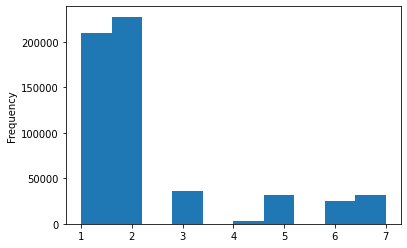

In [ ]:
# после предикција ги прикажуваме колку Cover_Type имаме,тоа го прикажуваме преку хистограм
sumbRFC_data['Cover_Type'].plot(kind='hist')

# **XGBoost**
гради дрво на одлука и работи на хистограм алгоритам,гради степен на дрво до max_depth,после праи кастрење до момент кога има добра точност.Прво не прави split туку го изградува дрвото и после го касти дрвото.

In [ ]:
# XGBClassifier

from xgboost import XGBClassifier

#'Id','Cover_Type' ги дропнаме од train dataset сите други колони ке бидат во train_X
#train_y ке биде само колоната Cover_Type таа ке биде што ке ја тестираме
train_X = train.drop(['Id','Cover_Type'],axis=1).values
train_y = train.Cover_Type.values
test_X = test.drop('Id',axis=1).values

# train_X и train_y ги делиме во train и test преку готовен функција со големина за test 0.2
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2)

#го инцализираме со XGBClassifier
xgb = XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, n_jobs=-1, verbose=1, learning_rate=0.16)
xgb.fit(X_train,y_train)

# правиме предикција преку XGBClassifier на X_test (предвидуавме таргет промелива врз база на влезни промеливи)
y_predXGB = xgb.predict(X_test)

In [ ]:
# на овој начин ги прикажиме сите метрики
print (metrics.classification_report(y_test,y_predXGB))

              precision    recall  f1-score   support

           1       0.83      0.78      0.81       477
           2       0.80      0.73      0.76       435
           3       0.86      0.84      0.85       414
           4       0.96      0.98      0.97       434
           5       0.91      0.96      0.94       416
           6       0.85      0.90      0.88       430
           7       0.92      0.97      0.94       418

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



In [ ]:
# Резултат на точност
print ("Accuaracy score with XGBoost: ",metrics.accuracy_score(y_test,y_predXGB))


Accuaracy score with XGBoost:  0.8779761904761905


In [ ]:
# предикцијата го чуваме според Ид на нов csv file
xgb.fit(train_X,train_y)
y_predXGBsumb = xgb.predict(test_X)

submXGB = pd.DataFrame(data=y_predXGBsumb, columns=['Cover_Type'])
print("Table of sumbbision with XGB")
print(submXGB)

submXGB['Id'] = test['Id']
submXGB.set_index('Id', inplace=True)

submXGB.to_csv('SubmissionXGB.csv')

sumbXGB_data = pd.read_csv("SubmissionXGB.csv")

print("Table of sumbbision with XGBoost")
print(sumbXGB_data.head())

Table of sumbbision with XGB
        Cover_Type
0                5
1                1
2                1
3                1
4                1
...            ...
565887           3
565888           3
565889           3
565890           3
565891           3

[565892 rows x 1 columns]
Table of sumbbision with XGBoost
      Id  Cover_Type
0  15121           5
1  15122           1
2  15123           1
3  15124           1
4  15125           1


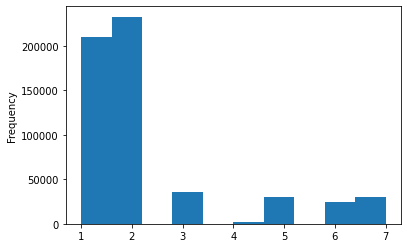

In [ ]:
# после предикција ги прикажуваме колку Cover_Type имаме,тоа го прикажуваме преку хистограм
sumbXGB_data['Cover_Type'].plot(kind='hist')

# Random Forest vs Xgboost

Algorithms were scored on each dataset and compared. The better performing algorithm have 1 point for each dataset. The more points assigned for the algorithm the better.

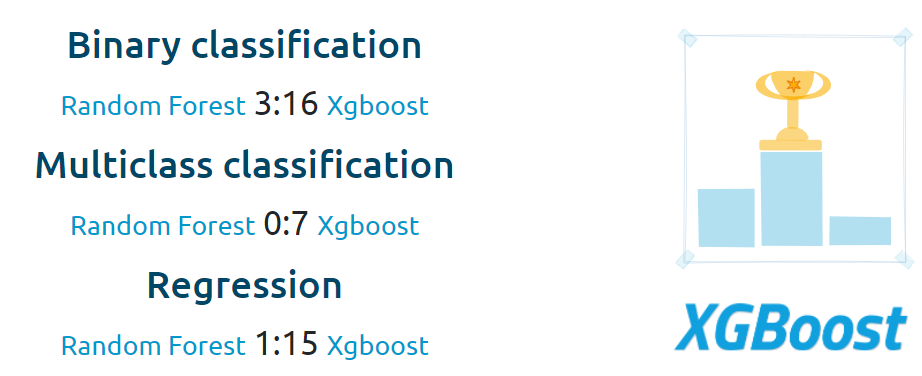


 - One of the most important differences between XG Boost and Random forest is that the XGBoost always gives more importance to functional space when reducing the cost of a model while Random Forest tries to give more preferences to hyperparameters to optimize the model.
 - Random forests are easier to tune than Boosting algorithms and easily adapt to distributed computing
 - XGBoost is a good option for unbalanced datasets but we cannot trust random forest in these types of cases.
